<a href="https://colab.research.google.com/github/aadityakamble18/Heat-Equation-with-PINNs-Inverse-Method/blob/main/PINN_with_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import deepxde as dde
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from scipy.stats import skew

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [ ]:
data_fl = pd.read_csv("/content/data_fl (1).csv")

In [ ]:
data_fl

,Scan Relative Time,CH103,CH108,CH112,CH115,CH122,CH125
0,0.000000,295.150187,295.003021,294.796882,294.641369,294.804220,294.726548
1,5.005122,295.154193,295.013397,294.799501,294.642262,294.810146,294.723998
2,10.005120,295.156482,295.004525,294.793077,294.641135,294.807506,294.728489
3,15.005123,295.150637,295.006212,294.792200,294.641400,294.802013,294.730317
4,20.005119,295.151375,295.004593,294.789251,294.641495,294.805977,294.728413
...,...,...,...,...,...,...,...
6224,31155.005130,958.593469,900.275761,804.570359,689.085457,579.672944,373.413583
6225,31160.005130,958.594645,900.284175,804.578129,689.086171,579.674936,373.406005
6226,31165.005120,958.610436,900.323602,804.570373,689.085355,579.674926,373.403503
6227,31170.020010,958.621550,900.368755,804.589237,689.092448,579.678816,372.965274


# EDA

In [ ]:
desc_stats = data_fl.describe()
desc_stats

,Scan Relative Time,CH103,CH108,CH112,CH115,CH122,CH125
count,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000
mean,15582.739110,837.686301,771.277292,680.750583,581.386513,496.019110,348.533573
std,9004.164279,168.583365,174.012704,159.429822,131.635735,98.353984,27.858105
min,0.000000,295.147343,294.996977,294.783469,294.639043,294.802013,294.723998
25%,7785.005122,785.910830,710.723322,612.354887,509.947869,433.563796,328.420378
50%,15580.005130,917.083381,854.986523,758.514530,645.547941,543.330652,361.174495
75%,23385.005120,957.637671,899.297102,802.575965,686.361534,576.912945,372.419316
max,31175.005130,961.179230,902.590591,806.577144,690.748202,580.943111,374.006876


In [ ]:
def calculate_statistics(data):
    desc_stats = data.describe()
    stats = {
        'Mean': desc_stats.loc['mean'],  # Access 'mean' using .loc
        'Median': np.median(data),
        'Mode': data.mode().iloc[0].tolist(),  # Convert mode to list
        'Standard Deviation': desc_stats.loc['std'],  # Access 'std' using .loc
        'Variance': desc_stats.loc['std'] ** 2,  # Access 'std' using .loc
        'Minimum': desc_stats.loc['min'],  # Access 'min' using .loc
        'Maximum': desc_stats.loc['max'],  # Access 'max' using .loc
        'Range': desc_stats.loc['max'] - desc_stats.loc['min'],  # Access 'max' and 'min' using .loc
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        '25th Percentile': desc_stats.loc['25%'],  # Access '25%' using .loc
        '50th Percentile (Median)': desc_stats.loc['50%'],  # Access '50%' using .loc
        '75th Percentile': desc_stats.loc['75%'],  # Access '75%' using .loc
        'Interquartile Range (IQR)': desc_stats.loc['75%'] - desc_stats.loc['25%']  # Access '75%' and '25%' using .loc
    }
    return stats

# Example Usage
stats = calculate_statistics(data_fl)

for key, value in stats.items():
    print(f"{key}: {value}")

Mean: Scan Relative Time    15582.739110
CH103                   837.686301
CH108                   771.277292
CH112                   680.750583
CH115                   581.386513
CH122                   496.019110
CH125                   348.533573
Name: mean, dtype: float64
Median: 686.0506406
Mode: [0.0, 295.1473426, 294.9969767, 294.7834694, 294.6390428, 294.8020128, 294.7239978]
Standard Deviation: Scan Relative Time    9004.164279
CH103                  168.583365
CH108                  174.012704
CH112                  159.429822
CH115                  131.635735
CH122                   98.353984
CH125                   27.858105
Name: std, dtype: float64
Variance: Scan Relative Time    8.107497e+07
CH103                 2.842035e+04
CH108                 3.028042e+04
CH112                 2.541787e+04
CH115                 1.732797e+04
CH122                 9.673506e+03
CH125                 7.760740e+02
Name: std, dtype: float64
Minimum: Scan Relative Time      0.000000
CH103

In [ ]:
# prompt: check null values in each column of data_fl

data_fl.isnull().sum()


,0
Scan Relative Time,0
CH103,0
CH108,0
CH112,0
CH115,0
CH122,0
CH125,0


In [ ]:
#check for infinite values
data_fl.isin([np.inf, -np.inf]).sum()

,0
Scan Relative Time,0
CH103,0
CH108,0
CH112,0
CH115,0
CH122,0
CH125,0


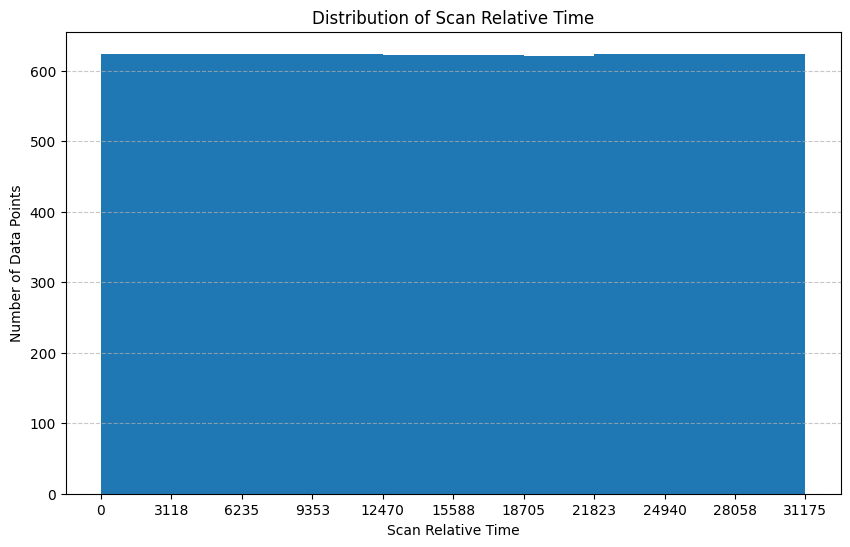

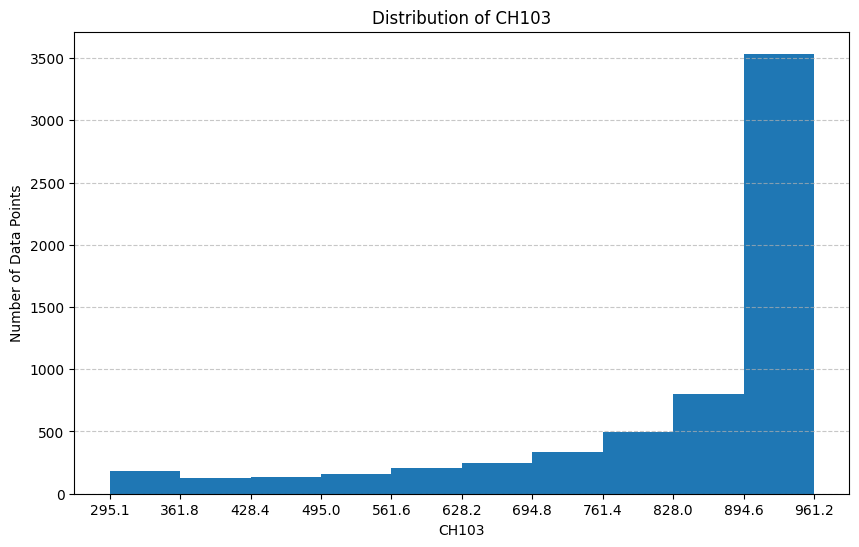

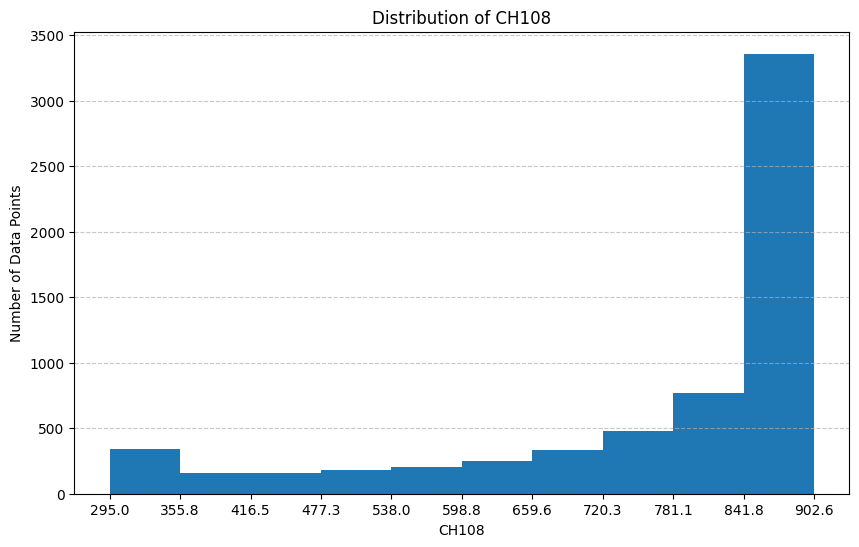

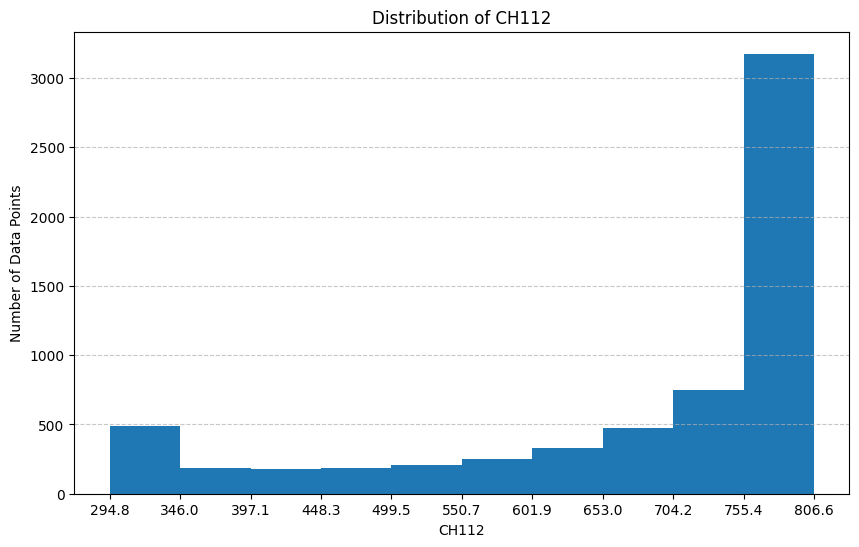

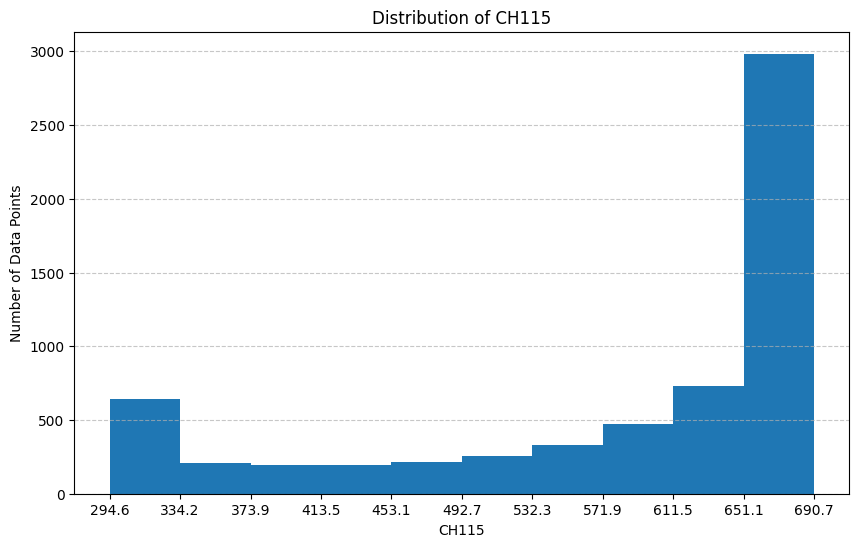

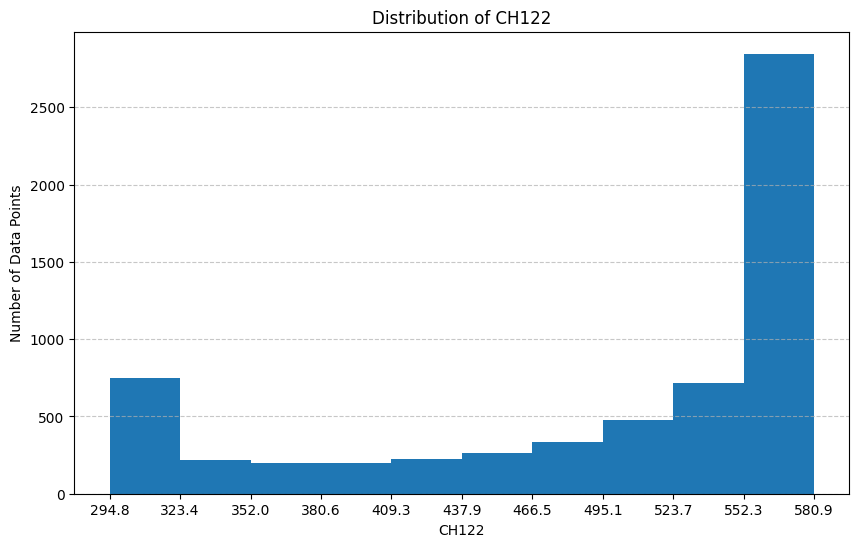

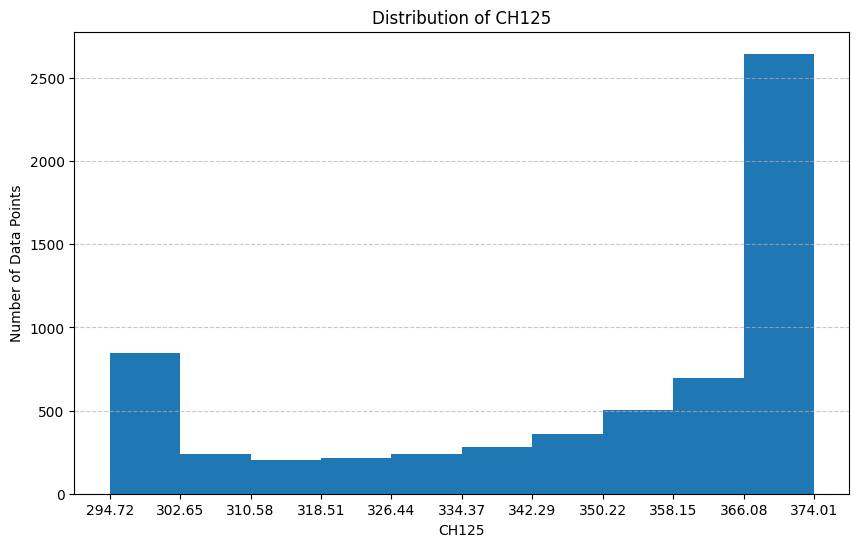

In [ ]:
# prompt: #data visualisation, bar graph for every column header vs. number of data points in a range of value

import matplotlib.pyplot as plt

# Assuming 'data_fl' DataFrame is already loaded as in your previous code

for col in data_fl.columns:
    # Determine the range of values for the current column
    min_val = data_fl[col].min()
    max_val = data_fl[col].max()

    # Create bins for the histogram
    num_bins = 10  # Adjust as needed
    bins = np.linspace(min_val, max_val, num_bins + 1)

    # Count data points in each bin
    hist, _ = np.histogram(data_fl[col], bins=bins)

    # Create the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], hist, width=(max_val - min_val) / num_bins, align='edge')
    plt.xlabel(col)
    plt.ylabel("Number of Data Points")
    plt.title(f"Distribution of {col}")
    plt.xticks(bins)  # Set x-axis ticks to the bin edges
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()


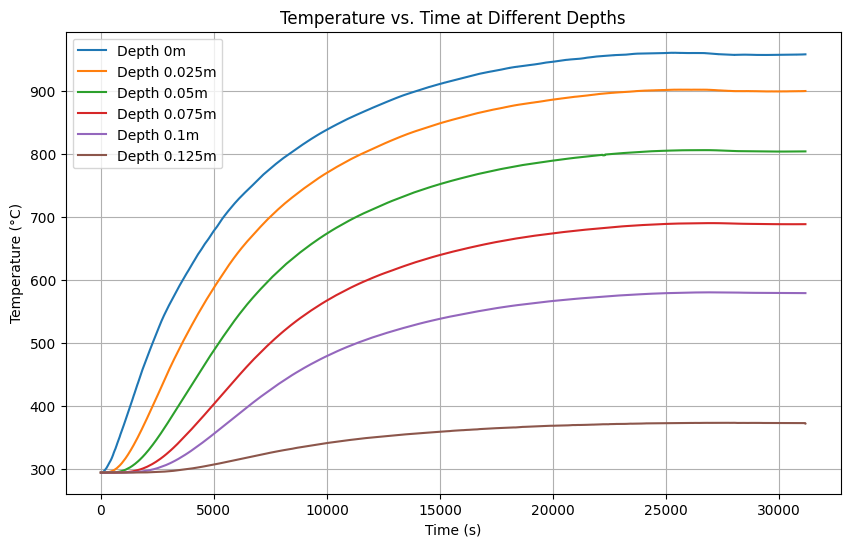

In [ ]:
# Define depths corresponding to each channel
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]

# Extract time and temperature data
time = data_fl['Scan Relative Time']
temperature_columns = ['CH103', 'CH108', 'CH112', 'CH115', 'CH122', 'CH125']

# Plot each temperature profile
plt.figure(figsize=(10, 6))  # Set figure size
for i, col in enumerate(temperature_columns):
    plt.plot(time, data_fl[col], label=f"Depth {depths[i]}m")  # Plot with depth labels

# Customize plot
plt.xlabel("Time (s)")  # Label X-axis
plt.ylabel("Temperature (°C)")  # Label Y-axis
plt.title("Temperature vs. Time at Different Depths")  # Title
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display plot


Using a 3D Line Plot (for clear depth-wise variation)

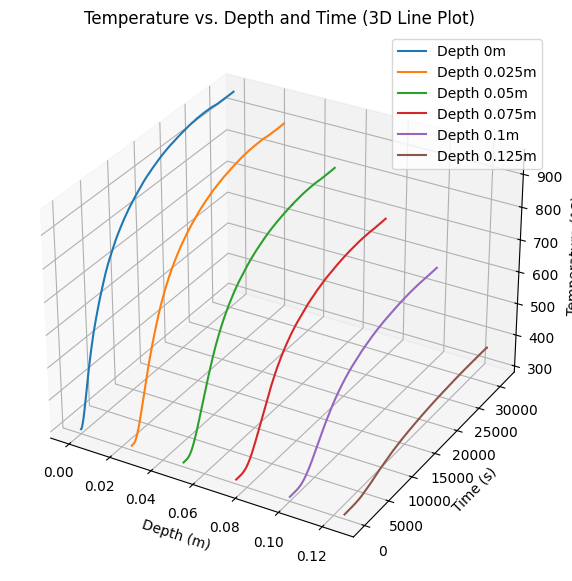

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define depths corresponding to each channel
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]

# Extract time and temperature data
time = data_fl['Scan Relative Time']
temperature_columns = ['CH103', 'CH108', 'CH112', 'CH115', 'CH122', 'CH125']

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each depth's temperature variation
for i, col in enumerate(temperature_columns):
    ax.plot([depths[i]] * len(time), time, data_fl[col], label=f"Depth {depths[i]}m")

# Customize plot
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Temperature (°C)")
ax.set_title("Temperature vs. Depth and Time (3D Line Plot)")
ax.legend()
plt.show()


Using a 3D Surface Plot (for a continuous temperature profile)

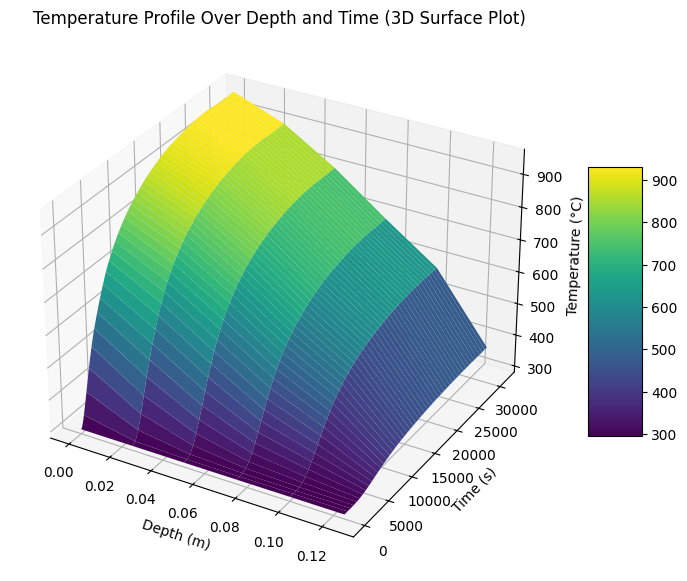

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # For color maps

# Convert time and depths to meshgrid format
depth_mesh, time_mesh = np.meshgrid(depths, time)

# Convert temperature data to a NumPy array
temperature_values = np.array([data_fl[col].values for col in temperature_columns]).T  # Transpose for correct shape

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(depth_mesh, time_mesh, temperature_values, cmap=cm.viridis, edgecolor='none')

# Customize plot
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Temperature (°C)")
ax.set_title("Temperature Profile Over Depth and Time (3D Surface Plot)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add color bar
plt.show()


In [ ]:
def read_data(filename, depths):
    df = data_fl # Assuming tab-separated values
    # df = pd.read_csv(filename, sep='\t')
    print(df)
    time = df['Scan Relative Time'].values  # Extract time values
    observe_x = np.array(depths).reshape(-1, 1)  # Define depth positions (x-values)
    observe_T = df.drop(columns=['Scan Relative Time']).values  # Temperature data

    print(observe_T)

    print('The shape of time is:' + str(time.shape))

    max_time = time.max()
    # time = time / max_time  # Normalize time to [0, 1] range if needed
    print('The Maximum time is:', max_time)
    return time, observe_x, observe_T, max_time


In [ ]:
# Set depths manually as provided in your description (replace with actual values)
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]  # Example depths in meters; adjust as needed
time, observe_x, observe_T, max_time = read_data('/content/data_fl (1).csv', depths)

      Scan Relative Time       CH103       CH108       CH112       CH115  \
0               0.000000  295.150187  295.003021  294.796882  294.641369   
1               5.005122  295.154193  295.013397  294.799501  294.642262   
2              10.005120  295.156482  295.004525  294.793077  294.641135   
3              15.005123  295.150637  295.006212  294.792200  294.641400   
4              20.005119  295.151375  295.004593  294.789251  294.641495   
...                  ...         ...         ...         ...         ...   
6224        31155.005130  958.593469  900.275761  804.570359  689.085457   
6225        31160.005130  958.594645  900.284175  804.578129  689.086171   
6226        31165.005120  958.610436  900.323602  804.570373  689.085355   
6227        31170.020010  958.621550  900.368755  804.589237  689.092448   
6228        31175.005130  958.625490  900.392748  804.592014  689.092274   

           CH122       CH125  
0     294.804220  294.726548  
1     294.810146  294.723

In [ ]:
print(observe_T)
print(observe_x)
print(time)

[[295.150187  295.0030212 294.7968817 294.6413692 294.8042198 294.7265485]
 [295.1541933 295.013397  294.7995006 294.6422619 294.8101463 294.7239978]
 [295.1564824 295.0045245 294.7930775 294.641135  294.8075063 294.7284886]
 ...
 [958.6104358 900.3236025 804.5703732 689.0853552 579.6749258 373.4035034]
 [958.6215501 900.3687545 804.5892367 689.0924477 579.6788161 372.9652736]
 [958.6254905 900.3927481 804.5920139 689.0922736 579.6833616 372.6932823]]
[[0.   ]
 [0.025]
 [0.05 ]
 [0.075]
 [0.1  ]
 [0.125]]
[0.00000000e+00 5.00512188e+00 1.00051197e+01 ... 3.11650051e+04
 3.11700200e+04 3.11750051e+04]


In [ ]:
# Flatten array to 1D
observe_T_flat = observe_T.flatten()
observe_x_flat = observe_x.flatten()

# Compute skewness
T_skewness = skew(observe_T_flat)
observe_x_skewness = skew(observe_x_flat)

print(f"Skewness of observed temperature: {T_skewness:.4f}")
print(f"Skewness of observed temperature: {observe_x_skewness:.4f}")


Skewness of observed temperature: -0.0113
Skewness of observed temperature: 0.0000


# Code

Initial guesses

In [ ]:
# Cp = dde.Variable(10000)
# k = dde.Variable(0.1)

In [ ]:
# Normalization
Cp_log = dde.Variable(np.log(80000))  # Train log(Cp)
k_log = dde.Variable(np.log(0.1))  # Train log(k)

In [ ]:
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Define min and max values
x_min, x_max = 0, 0.125
t_min, t_max = 0, 31175.00513

# Normalize space and time
geom = dde.geometry.Interval(0, 1)  # Normalized x ∈ [0,1]
timedomain = dde.geometry.TimeDomain(0, 1)  # Normalized t ∈ [0,1]
geomtime = dde.geometry.GeometryXTime(geom, timedomain)


In [ ]:
# geom = dde.geometry.Interval(0, 0.125)
# timedomain = dde.geometry.TimeDomain(0, 31175.00513)
# geomtime = dde.geometry.GeometryXTime(geom, timedomain)

PDE

In [ ]:
# Define the
def pde(x, y):
    T = y[:, 0:1]
    dT_t = dde.grad.jacobian(y, x, i=0, j=1)
    dT_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    return Cp_log * dT_t - k_log * dT_xx
    # return tf.exp(Cp_log) * dT_t - tf.exp(k_log) * dT_xx

IC and BC

In [ ]:
# T0 = 295.6390  # Initial temperature in Kelvin
T0 = 300.00

In [ ]:
T_min, T_max = 294.6390, 961.1792  # Assuming expected range of temperature (e.g., boiling and freezing points)

def normalize_T(T):
    return (T - T_min) / (T_max - T_min)

T0_scaled = normalize_T(T0)  # Normalize initial temperature

def fun_init(x):
    return np.full_like(x[:, 0:1], T0_scaled)

ic1 = dde.icbc.IC(geomtime, fun_init, lambda _, on_initial: on_initial)


In [ ]:
# T0 = 293.0  # Initial temperature in Kelvin

# def fun_init(x):
#     return np.full_like(x[:, 0:1], T0)

# ic1 = dde.icbc.IC(geomtime, fun_init, lambda _, on_initial: on_initial)
# ic1 = np.array(ic1)
# observe_u = np.array(observe_u)

Prepating Data For Input

In [ ]:
xx, tt = np.meshgrid(observe_x, time)

xx

array([[0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       ...,
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125]])

In [ ]:
tt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.00512188e+00, 5.00512188e+00, 5.00512188e+00, 5.00512188e+00,
        5.00512188e+00, 5.00512188e+00],
       [1.00051197e+01, 1.00051197e+01, 1.00051197e+01, 1.00051197e+01,
        1.00051197e+01, 1.00051197e+01],
       ...,
       [3.11650051e+04, 3.11650051e+04, 3.11650051e+04, 3.11650051e+04,
        3.11650051e+04, 3.11650051e+04],
       [3.11700200e+04, 3.11700200e+04, 3.11700200e+04, 3.11700200e+04,
        3.11700200e+04, 3.11700200e+04],
       [3.11750051e+04, 3.11750051e+04, 3.11750051e+04, 3.11750051e+04,
        3.11750051e+04, 3.11750051e+04]])

In [ ]:
X = np.vstack((np.ravel(xx), np.ravel(tt))).T  # Combined (x, t) coordinates
df = pd.DataFrame(X, columns =['Depths', 'Time'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Depths,Time
0,0.000,0.00000
1,0.025,0.00000
2,0.050,0.00000
3,0.075,0.00000
4,0.100,0.00000
...,...,...
37369,0.025,31175.00513
37370,0.050,31175.00513
37371,0.075,31175.00513
37372,0.100,31175.00513


In [ ]:
X

array([[0.00000000e+00, 0.00000000e+00],
       [2.50000000e-02, 0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00],
       ...,
       [7.50000000e-02, 3.11750051e+04],
       [1.00000000e-01, 3.11750051e+04],
       [1.25000000e-01, 3.11750051e+04]])

In [ ]:
# Min & Max values for normalization
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])  # x ∈ [0, 0.125]
t_min, t_max = np.min(X[:, 1]), np.max(X[:, 1])  # t ∈ [0, 31175.00513]

# Normalize function
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Normalize depth (x) and time (t)
X_normalized = np.copy(X)
X_normalized[:, 0] = normalize(X[:, 0], x_min, x_max)  # Normalize x
X_normalized[:, 1] = normalize(X[:, 1], t_min, t_max)  # Normalize t

print("Normalized X (x, t):")
print(X_normalized)

Normalized X (x, t):
[[0.  0. ]
 [0.2 0. ]
 [0.4 0. ]
 ...
 [0.6 1. ]
 [0.8 1. ]
 [1.  1. ]]


In [ ]:
observe_T = observe_T.flatten().reshape(-1, 1)  # Flatten temperature data for boundary conditions
observe_T

array([[295.150187 ],
       [295.0030212],
       [294.7968817],
       ...,
       [689.0922736],
       [579.6833616],
       [372.6932823]])

In [ ]:
print(observe_T.shape)

(37374, 1)


In [ ]:
# Extract min and max temperature
T_min = np.min(observe_T)
T_max = np.max(observe_T)

print(f"Min Temperature: {T_min:.4f} K")
print(f"Max Temperature: {T_max:.4f} K")

Min Temperature: 294.6390 K
Max Temperature: 961.1792 K


In [ ]:
# T_min, T_max = 273.0, 373.0  # Adjust based on real data

In [ ]:
# Normalize observed temperature
def normalize_T(T):
    return (T - T_min) / (T_max - T_min)

observe_T_normalized = normalize_T(observe_T)

# Use normalized values in PointSetBC
observe_u = dde.icbc.PointSetBC(X_normalized, observe_T_normalized)


In [ ]:
observe_T_normalized

array([[7.66861788e-04],
       [5.46071200e-04],
       [2.36803276e-04],
       ...,
       [5.91792120e-01],
       [4.27647611e-01],
       [1.17103576e-01]])

In [ ]:
# observe_u = dde.icbc.PointSetBC(X, observe_T)

In [ ]:
print(X.shape)

(37374, 2)


In [ ]:
# Define min and max values
x_min, x_max = 0, 0.125
t_min, t_max = 0, 31175.00513
T_min, T_max = 294.6390, 961.1792  # Assuming expected range of temperature

print(f"x_min: {x_min}, x_max: {x_max}")
print(f"t_min: {t_min}, t_max: {t_max}")
print(f"T_min (Normalization): {T_min}, T_max (Normalization): {T_max}")
print(f"T_min (Data): {np.min(observe_T):.4f}, T_max (Data): {np.max(observe_T):.4f}")  # Check actual data range

x_min: 0, x_max: 0.125
t_min: 0, t_max: 31175.00513
T_min (Normalization): 294.639, T_max (Normalization): 961.1792
T_min (Data): 294.6390, T_max (Data): 961.1792


Defining a time-dependent **PDE problem**

In [ ]:
# data = dde.data.TimePDE(
#     geomtime,                      # The geometry and time domain (spatial and temporal boundaries)
#     pde,                           # The PDE to be solved
#     [ic1, observe_u],              # List of initial conditions and observations
#     num_domain=1000,               # Number of points sampled in the interior of the domain (training points)
#     num_initial=100,               # Number of points at the initial time to apply the initial condition
#     anchors=X,                     # Observation points where the solution will be sampled during training
#     num_test=20000,                # Number of test points for evaluating the model
#     solution=fun_init,
# )

In [ ]:
data = dde.data.TimePDE(
    geomtime,                      # The geometry and time domain (spatial and temporal boundaries)
    pde,                           # The PDE to be solved
    [ic1, observe_u],              # List of initial conditions and observations
    num_domain=1000,               # Number of points sampled in the interior of the domain (training points)
    num_initial=100,               # Number of points at the initial time to apply the initial condition
    anchors=X_normalized,          # Observation points where the solution will be sampled during training
    num_test=25000,                # Number of test points for evaluating the model
    # solution=fun_init,
)

In [ ]:
layer_size = [2] + [32] * 4 + [1]
activation = "tanh"
initializer = "Glorot uniform" # Change to He normal, LeCun normal,Glorot normal, etc.
net = dde.nn.FNN(layer_size, activation, initializer)

In [ ]:
# lr_schedule = dde.callbacks.LearningRateScheduler(lambda t: 1e-5 * 0.95 ** (t / 5000))
# model.compile("adam", lr=1e-5, lr_decay=lr_schedule)


In [ ]:
# import tensorflow as tf

# model = dde.Model(data, net)

# # Define learning rate schedule
# initial_learning_rate = 0.000001  # Your initial learning rate
# decay_steps = 5000            # Decay steps as in your original code
# decay_rate = 0.95             # Decay rate as in your original code

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=decay_steps,
#     decay_rate=decay_rate,
#     staircase=False  # Use continuous decay (default)
# )

# # Compile the model with the scheduler
# # Pass the lr_schedule as a function to the lr argument, providing the step
# model.compile("rmsprop", lr=lambda: lr_schedule(model.train_state.step), metrics=["l2 relative error"],
#               external_trainable_variables=[Cp_log, k_log])

In [ ]:
# dde.optimizers.set_LBFGS_options({'maxcor': 50, 'ftol': 1.0 * np.finfo(float).eps})

# Training

In [ ]:
model = dde.Model(data, net)
# model.compile("adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=[Cp,k])
# model.compile("adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=[Cp_log,k_log])
# model.compile("adam", lr=0.0000005, metrics=["mean squared error","l2 relative error"],
              # external_trainable_variables=[Cp_log, k_log])    #"l2 relative error",

# lr_schedule = dde.callbacks.LearningRateScheduler(lambda t: 1e-5 * 0.95 ** (t / 5000))
model.compile("rmsprop", lr=0.01,
              external_trainable_variables=[Cp_log, k_log])    #"l2 relative error",


# model.compile("rmsprop", lr_schedule, metrics=["l2 relative error"],
#               external_trainable_variables=[Cp_log, k_log])

Compiling model...
'compile' took 0.431740 s



**Physics-Informed Neural Networks (PINNs)**

X: Residual loss (PDE equation error)

Y: Boundary condition loss

Z: Initial condition loss

In [ ]:
variable = dde.callbacks.VariableValue([Cp_log,k_log], period=1000,filename="variables.dat")  #filename="variables.dat"
losshistory, train_state = model.train(iterations=20000, callbacks=[variable])
# model.compile("adam", lr=0.001)
# losshistory, train_state = model.train(iterations=25000, callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-5, patience=5000)])


Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.91e+00, 6.25e-02, 8.57e-01]    [5.79e+00, 6.25e-02, 8.57e-01]    []  
1000      [3.97e-02, 1.93e-02, 2.02e-01]    [3.62e-02, 1.93e-02, 2.02e-01]    []  
2000      [2.20e-03, 6.75e-02, 5.36e-02]    [1.62e-03, 6.75e-02, 5.36e-02]    []  
3000      [1.73e-02, 7.42e-03, 5.66e-02]    [1.16e-02, 7.42e-03, 5.66e-02]    []  
4000      [2.05e-02, 6.39e-03, 4.54e-02]    [1.93e-02, 6.39e-03, 4.54e-02]    []  
5000      [1.62e-02, 1.23e-02, 5.04e-02]    [1.22e-02, 1.23e-02, 5.04e-02]    []  
6000      [1.18e-02, 1.31e-02, 1.57e-02]    [1.13e-02, 1.31e-02, 1.57e-02]    []  
7000      [1.04e-02, 1.61e-02, 1.60e-02]    [8.28e-03, 1.61e-02, 1.60e-02]    []  
8000      [1.10e-02, 7.98e-03, 1.02e-02]    [1.11e-02, 7.98e-03, 1.02e-02]    []  
9000      [1.47e-04, 3.73e-04, 1.75e-03]    [1.34e-04, 3.73e-04, 1.75e-03]    []  
10000     [1.05e-04, 9.84e-04, 1.72e-03]    [1.02e-04, 9.84e-

In [ ]:
import pandas as pd

# Load the saved data from "variables.dat"
result = pd.read_csv("variables.dat", delim_whitespace=True, header=None)

# Assign column names (if needed)
result.columns = ["Iteration", "Cp", "k"]

# Save to Excel
result.to_excel("variables.xlsx", index=False)

print("Saved to variables.xlsx")


Saved to variables.xlsx


<ipython-input-62-894e0f172691>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  result = pd.read_csv("variables.dat", delim_whitespace=True, header=None)


Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


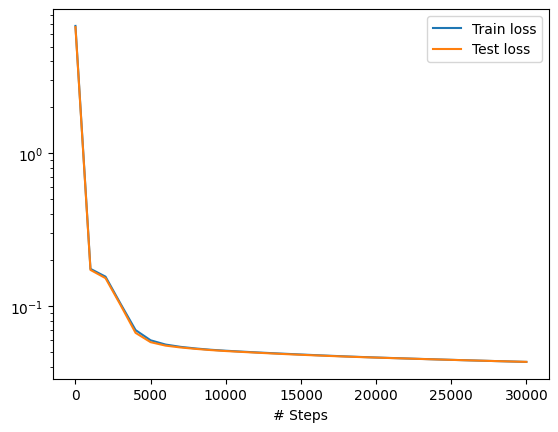

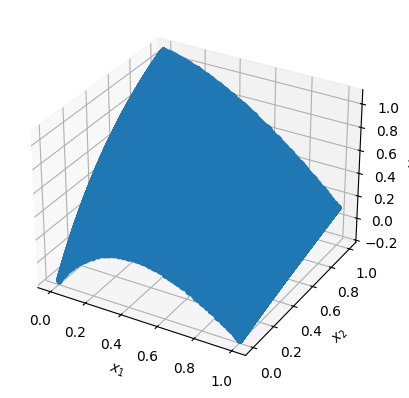

In [ ]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

What This Graph Represents

X-axis (
𝑥1
​
 ): Spatial domain variable (
𝑥
).

Y-axis (
𝑥2
​
 ): Temporal domain variable (
𝑡
).

Z-axis (
𝑢
(
𝑥
,
𝑡
)): The predicted solution from the neural network.

# Confusion Matrix

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_pred = model.predict(X_normalized)
# # Compute confusion matrix
# cm = confusion_matrix(observe_T_normalized, y_pred)

# # Display confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


# r2_score

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_normalized)

# Calculate R-squared
r2 = r2_score(observe_T_normalized, y_pred)

print(f"R-squared: {r2:.4f}")

R-squared: 0.8023


# Results

In [ ]:
results = pd.read_excel('/content/variables.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/variables.xlsx'

In [ ]:
results

,Iteration,Cp,k
0,0,"[8.52e+00,",-2.30e+00]
1,1000,"[8.52e+00,",-2.30e+00]
2,2000,"[8.52e+00,",-2.30e+00]
3,3000,"[8.52e+00,",-2.30e+00]
4,4000,"[8.52e+00,",-2.30e+00]
...,...,...,...
56,56000,"[8.52e+00,",-2.30e+00]
57,57000,"[8.52e+00,",-2.30e+00]
58,58000,"[8.52e+00,",-2.30e+00]
59,59000,"[8.52e+00,",-2.30e+00]


In [ ]:
Cp_learned = Cp_log.value
k_learned = k_log.value

print(f"Estimated Cp: {Cp_learned}")
print(f"Estimated k: {k_learned}")


Estimated Cp: <bound method RefVariable.value of <tf.Variable 'Variable:0' shape=() dtype=float32_ref>>
Estimated k: <bound method RefVariable.value of <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>>


In [ ]:
# Cp_learned, k_learned = .get_variable_values([Cp_log, k_log])

In [ ]:
with open("variables.dat", "r") as f:
    lines = f.readlines()

In [ ]:
data1 = np.loadtxt("variables.dat")
iterations = data1[:, 0]  # First column is iteration number
Cp_values = data1[:, 1]   # Second column is Cp_log
k_values = data1[:, 2]    # Third column is k_log

plt.plot(iterations, Cp_values, label="Cp_log")
plt.plot(iterations, k_values, label="k_log")
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.legend()
plt.title("Evolution of Trainable Variables")
plt.show()


ValueError: could not convert string '[8.52e+00,' to float64 at row 0, column 2.

# unscale

In [ ]:
# Cp_estimated = np.exp(Cp_log.value)
# k_estimated = np.exp(k_log.value)
Cp_estimated = np.exp(8.03)
k_estimated = np.exp(-2.30)

print(f"Estimated Cp: {Cp_estimated}")
print(f"Estimated k: {k_estimated}")


Estimated Cp: 3071.741673272096
Estimated k: 0.10025884372280375


In [ ]:
# Cp_estimated = np.exp(Cp_log.value)
# k_estimated = np.exp(k_log.value)
Cp_estimated = np.exp(9.14)
k_estimated = np.exp(-1.72)

print(f"Estimated Cp: {Cp_estimated}")
print(f"Estimated k: {k_estimated}")

In [ ]:
import pandas as pd

data = []
for line in lines:
    parts = line.strip().split(":")  # Split at ":"
    if len(parts) < 2:
        continue  # Skip malformed lines

    iteration = int(parts[0].split()[1])  # Extract iteration number
    values = list(map(float, parts[1].split(",")))  # Convert values to float
    data.append([iteration] + values)

# Create DataFrame
df = pd.DataFrame(data, columns=["Iteration", "C1", "C2"])

In [ ]:
print(df.head())  # View first few rows

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df["Iteration"], df["C1"], label="C1")
plt.plot(df["Iteration"], df["C2"], label="C2")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.title("Convergence of External Variables")
plt.show()
